# Exam of Programming (19/02/2025)

## EX1
Write a function that takes a list of booleans as input and prints a dictionary with two
keys: “True” and “False”. The value associated with the keys is the number of True
values found in the input list, and the number of False values, respectively.

a.Assume that the input is correct, meaning that it is always a list of booleans.

In [41]:
from operator import truediv

from jinja2 import pass_context
from numpy.ma.core import negative
from scipy.stats import false_discovery_control


def count_value(list_n):
    dict_TF ={'True': 0, 'False':0 }
    for l in list_n:
        if l:
            dict_TF['True'] += 1
        else:
            dict_TF['False'] += 1
    print(dict_TF)

dati = [True, False, False, True, False]
count_value(dati)

{'True': 2, 'False': 3}


## EX2
Write a function that takes a list of integers in input and returns a list containing all the positive integers of the input list that are divisible by 13. You must do this in one line of code.

a. Assume that the input is always correct, i.e. a list of integers.

In [42]:
def number_divisible_for_13(list_of_number):
    return [l for l in list_of_number if l > 0 and l % 13 == 0]

mia_lista = [-26, -5, 0, 13, 25, 26, 39, -1]
lista_filtrata = number_divisible_for_13(mia_lista)
print(lista_filtrata)

[13, 26, 39]


## EX3
Write an object Product that has two attributes, “name” (a string) and “quantity” (an
integer), and a method to increase or decrease the quantity by a set amount. After
this, write an object Blender that inherits from Product and has an additional
attribute “capacity” (an integer). Two objects of type Blender should result equal
(when tested with “==”) if they have the same name, and the same is true for two
objects of type Product. An object of type Product and one of type Blender should
never be equal, even if they have the same name.

In [43]:
# ==========================
# DEFINIZIONE DELLE CLASSI
# ==========================

class Product:
    """
    Rappresenta un prodotto generico con un nome e una quantità.
    """
    def __init__(self, name: str, quantity: int):
        self.name = name
        self.quantity = quantity

    def update_quantity(self, amount: int):
        """
        Aumenta o diminuisce la quantità del prodotto.
        """
        if self.quantity + amount >= 0:
            self.quantity += amount
        else:
            print(f"Operazione non possibile: la quantità non può diventare negativa.")

    def __eq__(self, other):
        """
        Definisce l'uguaglianza (==). Due oggetti sono uguali se sono dello
        stesso tipo e hanno lo stesso nome.
        """
        if type(self) != type(other):
            return False
        return self.name == other.name

    def __repr__(self):
        # Metodo per una stampa più chiara
        return f"Product(name='{self.name}', quantity={self.quantity})"

# La classe Blender eredita da Product
class Blender(Product):
    """
    Rappresenta un frullatore. Eredita da Product e aggiunge l'attributo 'capacity'.
    Non ha bisogno di un suo metodo __eq__ perché quello ereditato è già perfetto.
    """
    def __init__(self, name: str, quantity: int, capacity: int):
        # Chiama il costruttore della classe madre (Product)
        super().__init__(name, quantity)
        # Aggiunge il suo attributo specifico
        self.capacity = capacity

    def __repr__(self):
        # Sovrascriviamo __repr__ per una stampa più completa
        return f"Blender(name='{self.name}', quantity={self.quantity}, capacity={self.capacity}ml)"

# ==========================
# TEST E VERIFICA
# ==========================

print("--- Test di creazione e aggiornamento ---")
my_blender = Blender("FrulloMax 5000", 10, 1500)
print(my_blender)
my_blender.update_quantity(-3)
print(f"Quantità dopo la vendita: {my_blender.quantity}")

print("\n" + "="*40 + "\n")

print("--- Test di uguaglianza (==) ---")

# Test 1: Due Blender con lo stesso nome
blender_A = Blender("FrulloMax 5000", 10, 1500)
blender_B = Blender("FrulloMax 5000", 5, 1000) # Stesso nome, altri attributi diversi
print(f"blender_A == blender_B: {blender_A == blender_B}") # Atteso: True

# Test 2: Due Blender con nome diverso
blender_C = Blender("TurboMix", 1, 800)
print(f"blender_A == blender_C: {blender_A == blender_C}") # Atteso: False

# Test 3: Un Product e un Blender con lo stesso nome
product_D = Product("FrulloMax 5000", 20)
print(f"blender_A == product_D: {blender_A == product_D}") # Atteso: False
print(f"product_D == blender_A: {product_D == blender_A}") # Atteso: False

--- Test di creazione e aggiornamento ---
Blender(name='FrulloMax 5000', quantity=10, capacity=1500ml)
Quantità dopo la vendita: 7


--- Test di uguaglianza (==) ---
blender_A == blender_B: True
blender_A == blender_C: False
blender_A == product_D: False
product_D == blender_A: False


## EX4
Write a function that takes a sorted list of integers as input and returns a list containing all the unique integers in the input list (no repetitions), sorted in the opposite way from the input list.
This means that if the input list was sorted in an ascending order, then the output list will be sorted in a descending order.
 - Assume that the input is always correct, i.e. it is always a sorted list of
integers.

In [44]:
def inverti_ordinamento_unici(lista_ordinata: list) -> list:
    """
    Prende una lista ordinata di interi, rimuove i duplicati
    e la restituisce ordinata nella direzione opposta.
    """

    # 1. Rimuovi i duplicati dalla lista di input.
    #    Suggerimento: usa la conversione list -> set -> list.
    elementi_unici = set(lista_ordinata)  # Il tuo codice qui

    # Se la lista di input ha meno di 2 elementi, non c'è un "ordinamento"
    # da invertire. Possiamo restituire direttamente la lista con elementi unici.
    if len(lista_ordinata) < 2:
        return list(elementi_unici)

    # 2. Controlla la direzione dell'ordinamento originale.
    #    Suggerimento: confronta il primo e l'ultimo elemento della lista_ordinata.
    if lista_ordinata[0] < lista_ordinata[-1]: # -1 -> controlla ultimo elemento nell'array
        # La lista originale è CRESCENTE.
        # 3a. Ordina 'elementi_unici' in modo DECRESCENTE.
        #     Suggerimento: usa sorted() con il parametro 'reverse'.
        lista_risultato = sorted(elementi_unici, reverse=True) # Il tuo codice qui
    else:
        # La lista originale è DECRESCENTE (o tutti gli elementi sono uguali).
        # 3b. Ordina 'elementi_unici' in modo CRESCENTE.
        lista_risultato = sorted(elementi_unici, reverse=False) # Il tuo codice qui

    # 4. Restituisci la lista finale.
    return lista_risultato

# --- Prova il tuo codice con questi esempi ---

# Esempio 1: da crescente a decrescente
lista_crescente = [1, 2, 2, 5, 9, 9, 9, 10]
#Risultato atteso: [10, 9, 5, 2, 1]
print(f"Da {lista_crescente} -> {inverti_ordinamento_unici(lista_crescente)}")

# Esempio 2: da decrescente a crescente
lista_decrescente = [10, 8, 8, 3, 1]
#Risultato atteso: [1, 3, 8, 10]
print(f"Da {lista_decrescente} -> {inverti_ordinamento_unici(lista_decrescente)}")

# Esempio 3: lista con un solo elemento
lista_corta = [100]
#Risultato atteso: [100]
print(f"Da {lista_corta} -> {inverti_ordinamento_unici(lista_corta)}")

Da [1, 2, 2, 5, 9, 9, 9, 10] -> [10, 9, 5, 2, 1]
Da [10, 8, 8, 3, 1] -> [1, 3, 8, 10]
Da [100] -> [100]


## EX5
Write a function that takes a list of dictionaries as input and returns a list containing all the values from the dictionary (or dictionaries) in the input list that contain the highest number of keys. If the input is not of the correct type (a list of dictionaries), then print the string “WRONG INPUT TYPE” and exit the function.

In [45]:
def high_values (dict_list:list) -> list:
    if not isinstance(dict_list,list) or not all(isinstance(d,dict) for d in dict_list):
        print('WRONG INPUT TYPE')
        return

    if not dict_list:
        return []

    max_keys = max(len(d)for d in dict_list)
    result = []

    for d in dict_list:
        if len(d) == max_keys:
            result.extend(d.values())
    return result

test_list = [
    {"a": 1, "b": 2},
    {"x": 10, "y": 20, "z": 30},
    {"m": 100, "n": 200}
]
print(high_values(test_list))

[10, 20, 30]


## EX6
Write a function that takes three integers in input, a, b and c. The function will return a Numpy array of shape aXb filled by random integers between 0 and c.

a. Ex: if a = 2, b = 3, and c= 12, a possible output can be: array([[ 9, 10, 10], [ 8, 7, 8]])

b. Ps. since we are dealing with random integers, your result with the same
parameters might vary.

In [46]:
import numpy as np
def creation_array(a:int,b:int,c:int) -> np.ndarray:
    array = np.random.randint(0,c+1,size = (a,b))
    return array

print(creation_array(2,3,12))


[[ 0 12  5]
 [ 9  9 10]]


## EX7
Write a function that takes two lists of integers and returns a numpy array that is the result of the multiplication of the two input lists. The output needs to be a vector of exactly 5 integers, so if the array resulted from the multiplication has less than 5 integers, then you need to insert 0s for padding until it reaches 5 integers of length (you can choose in which direction you want to insert the padding). If the array resulted from of the multiplication contains more than 5 integers, then it needs to be truncated to only 5. Do not check the input for correctness, but if an exception arises print “EXCEPTION” and exit the function.

In [47]:
def fun(list1:list, list2:list) -> np.ndarray:
    try:
        # Converti le liste in array numpy
        arr1 = np.array(list1)
        arr2 = np.array(list2)

        # Moltiplica elemento per elemento
        result = arr1 * arr2

        # Se il risultato è più corto di 5, aggiungi padding di zeri
        if len(result) < 5:
            result = np.pad(result, (0, 5 - len(result)), 'constant')

        # Se il risultato è più lungo di 5, troncalo
        if len(result) > 5:
            result = result[:5]

        return result
    except Exception:
        print("EXCEPTION")
        return


l1 = [5,6,7,5,8]
l2 = [1,2,3,4,5]

print(fun(l1,l2)) # OK
print(fun(2,3)) # EXCEPTION

l1 = [5,6,7,5,8,8,7]
l2 = [1,2,3,4,5,7,7]
print(fun(l1,l2)) # OK TRONCATO

l1 = [5,6,7]
l2 = [1,2,3]
print(fun(l1,l2)) # OK CON PADDING


[ 5 12 21 20 40]
EXCEPTION
None
[ 5 12 21 20 40]
[ 5 12 21  0  0]


## EX8
Write a function that takes a Numpy array of integers as input and returns an integer representing the number of negative odd integers in the input array. Do not use for loops, while loops, if statements and list comprehensions.

In [48]:
def count_neg(arr:np.ndarray) -> int:
    mask = arr < 0
    odd_mask = arr%2 == 0

    return np.sum(mask & odd_mask)


## EX9
Write a function that takes a list of Numpy arrays (containing only integers) as input and
returns the array that has the highest mean, and the mean itself.

In [49]:
def highest_mean(l: list):
    max = l[0].mean()
    array = l[0]
    for list_i in l:
        if max < list_i.mean():
            max = list_i.mean()
            array = list_i
    return array,max

# Test 1: array con valori positivi
arr1 = np.array([1, 2, 3])          # media 2
arr2 = np.array([4, 5, 6])          # media 5 (massima)
arr3 = np.array([2, 2, 2])          # media 2
test1 = [arr1, arr2, arr3]
risultato1 = highest_mean(test1)
print("Test 1:", risultato1)  # Atteso: ([4, 5, 6], 5.0)

# Test 2: array con valori negativi
arr4 = np.array([-1, -2, -3])       # media -2
arr5 = np.array([-4, 0, 4])         # media 0 (massima)
arr6 = np.array([-5, -5, -5])       # media -5
test2 = [arr4, arr5, arr6]
risultato2 = highest_mean(test2)
print("Test 2:", risultato2)  # Atteso: ([-4, 0, 4], 0.0)

# Test 3: array di lunghezze diverse
arr7 = np.array([1, 1])             # media 1
arr8 = np.array([2, 2, 2, 2])       # media 2 (massima)
arr9 = np.array([1, 1, 1])          # media 1
test3 = [arr7, arr8, arr9]
risultato3 = highest_mean(test3)
print("Test 3:", risultato3)  # Atteso: ([2, 2, 2, 2], 2.0)

Test 1: (array([4, 5, 6]), np.float64(5.0))
Test 2: (array([-4,  0,  4]), np.float64(0.0))
Test 3: (array([2, 2, 2, 2]), np.float64(2.0))


## EX10
Write a lambda function that takes an integer “n” in input and returns a Numpy array
made of “n” zeros.

In [50]:
arr = lambda n: np.zeros(n)

print(arr(5))

[0. 0. 0. 0. 0.]


## EX11
Without changing the names of the columns and using Pandas, merge the three csv
into a unified DataFrame. Use an outer join.

In [51]:
import pandas as pd

df_parking = pd.read_csv('parking.csv')
df_salaries = pd.read_csv('salaries.csv')
df_team = pd.read_csv('team.csv')

import pandas as pd

df_parking = pd.read_csv('parking.csv')
df_salaries = pd.read_csv('salaries.csv')
df_team = pd.read_csv('team.csv')

# Prima unisci parking e team sulla colonna 'ID'
df_pt = pd.merge(df_team, df_parking, left_on='ID',right_on='E ID', how='outer')

# Poi unisci il risultato con salaries sulla colonna 'position'/'Position'
df_finale = pd.merge(df_pt, df_salaries, left_on='position', right_on='Position', how='outer')

## EX13
Remove the redundant columns (choose wisely which ones to remove) and fill the NaN in the numeric columns with the mean value of the specific column.

In [52]:
df_finale = df_finale.drop(['E ID','Position'],axis = 1)

df_finale['Starting salary'] = df_finale['Starting salary'].fillna(df_finale['Starting salary'].mean())

## EX14
Using pyplot, create two subplots in the same canvas. In the first you need to show a
bar chart that shows the mean of the salaries for people with a parking spot, and
people without (this should only have two bars). In the second subplot you need to
show a bar chart of the mean of the salaries per position (this will have many more
bars).

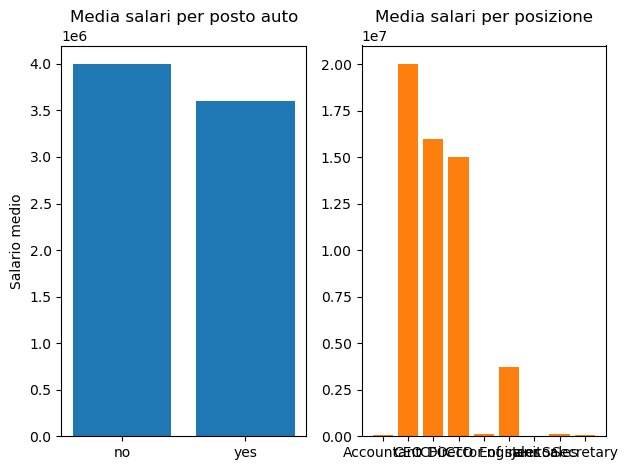

In [69]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(1,2)
mean_by_parking = df_finale.groupby('parking spot')['Starting salary'].mean()
ax[0].bar(mean_by_parking.index, mean_by_parking.values)
ax[0].set_title('Media salari per posto auto')
ax[0].set_ylabel('Salario medio')
mean_by_position = df_finale.groupby('position')['Starting salary'].mean()
ax[1].bar(mean_by_position.index,mean_by_position.values)
ax[1].bar(mean_by_position.index, mean_by_position.values)
ax[1].set_title('Media salari per posizione')
plt.tight_layout()
plt.show()

## EX15
Using pandas, answer the question: On average, do the people that have a parking spot make more money than the people that do not have a parking spot?

In [71]:
# Calcola la media dei salari raggruppando per posto auto
media_salari = df_finale.groupby('parking spot')['Starting salary'].mean()

print("Media salari:")
print(f"Con posto auto (yes): {media_salari['yes']:,.2f}€")
print(f"Senza posto auto (no): {media_salari['no']:,.2f}€")
print(f"\nDifferenza: {media_salari['yes'] - media_salari['no']:,.2f}€")

Media salari:
Con posto auto (yes): 3,604,387.76€
Senza posto auto (no): 3,997,571.43€

Differenza: -393,183.67€
